哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [3]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
dfA = pd.read_csv('A_lvr_land_A.csv')
dfB = pd.read_csv('B_lvr_land_A.csv')
dfE = pd.read_csv('E_lvr_land_A.csv')
dfF = pd.read_csv('F_lvr_land_A.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
dfA=dfA.drop(0)
dfB=dfB.drop(0)
dfE=dfE.drop(0)
dfF=dfF.drop(0)

In [7]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
dfA['city']='Taipei'
dfB['city']='Taichung'
dfE['city']='Kaohsiung'
dfF['city']='New_Taipei'

In [10]:
#4. 將以上四份資料運用pd.concat()串接
df=pd.concat([dfA, dfB, dfE, dfE]).reset_index(drop=True)

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [12]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [14]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df=df.rename(columns=columns_mapping)
df.columns

Index(['towns', 'transaction_sign', 'house_number', 'land_area_square_meter',
       'use_zoning', 'land_use_district', 'land_use', 'tx_dt',
       'transaction_pen_number', 'shifting_level', 'total_floor_number',
       'building_state', 'main_use', 'main_materials', 'complete_date',
       'building_area_square_meter', 'room_number', 'hall_number',
       'health_number', 'compartmented_number', 'manages', 'total_price',
       'unit_price', 'berth_category', 'berth_area_square_meter',
       'berth_price', 'note', 'serial_number', 'main_building_area',
       'auxiliary_building_area', 'balcony_area', 'elevator', 'city'],
      dtype='object')

In [74]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df2=df[(df['main_use']=='住家用') & (df['use_zoning']=='住')]
data=pd.DataFrame(df2,columns=analysis_columns)
data=data.dropna()

In [75]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
data.info()
data=data.astype(columns_type)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5846 entries, 0 to 52149
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        5846 non-null   object 
 1   towns                       5846 non-null   object 
 2   main_use                    5846 non-null   object 
 3   use_zoning                  5846 non-null   object 
 4   total_price                 5846 non-null   object 
 5   building_area_square_meter  5846 non-null   object 
 6   main_building_area          5846 non-null   float64
 7   tx_dt                       5846 non-null   object 
 8   unit_price                  5846 non-null   object 
 9   room_number                 5846 non-null   object 
 10  hall_number                 5846 non-null   object 
 11  health_number               5846 non-null   object 
dtypes: float64(1), object(11)
memory usage: 593.7+ KB
<class 'pandas.core.frame.DataFrame'>
I

In [88]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
data['tx_dt_year']=data['tx_dt'].str[0:3]
da2=data[(data['tx_dt_year']=='109') & (data['room_number'].between(1,5)) & (data['hall_number'].between(1,2))].reset_index(drop=True)

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [89]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
da2['building_area_square_feet']=da2['building_area_square_meter']*0.3025
da2['main_building_area_square_feet']=da2['main_building_area']*0.3025
da2['unit_price_square_feet']=da2['unit_price']/0.3025
da2.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,5.107000e+03,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5.107000e+03
mean,1.093848e+07,129.818696,87.709975,83916.289211,2.997846,1.819855,1.907186,39.270156,26.532267,2.774092e+05
std,1.313388e+07,68.756734,44.027464,66414.888039,0.942010,0.384346,0.772623,20.798912,13.318308,2.195533e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,1.000000,0.293425,0.000000,0.000000e+00
25%,4.395000e+06,86.215000,63.665000,42124.500000,3.000000,2.000000,1.000000,26.080037,19.258662,1.392545e+05
50%,7.000000e+06,116.970000,81.440000,56802.000000,3.000000,2.000000,2.000000,35.383425,24.635600,1.877752e+05
75%,1.300000e+07,158.180000,102.075000,108116.000000,3.000000,2.000000,2.000000,47.849450,30.877687,3.574083e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


In [90]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
# Ans: 有,main_building_area=0
da2=da2.loc[da2['main_building_area']!=0]

In [91]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
da2.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,5.046000e+03,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5.046000e+03
mean,1.099352e+07,129.882461,88.770281,84305.243757,2.996829,1.819461,1.907848,39.289445,26.853010,2.786950e+05
std,1.319582e+07,68.849035,43.217045,66686.502581,0.942126,0.384674,0.772951,20.826833,13.073156,2.204512e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,1.000000,2.250600,2.250600,1.070744e+04
25%,4.400000e+06,86.427500,64.810000,42096.000000,3.000000,2.000000,1.000000,26.144319,19.605025,1.391603e+05
50%,7.000000e+06,116.950000,81.875000,56977.500000,3.000000,2.000000,2.000000,35.377375,24.767187,1.883554e+05
75%,1.310000e+07,157.857500,102.497500,110329.500000,3.000000,2.000000,2.000000,47.751894,31.005494,3.647256e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [92]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
da2.loc[da2.city=='Taipei'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
total_price,1.000000,0.581290
building_area_square_meter,0.864627,0.218185
main_building_area,0.710515,0.112488
unit_price,0.581290,1.000000
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
building_area_square_feet,0.864627,0.218185
main_building_area_square_feet,0.710515,0.112488
unit_price_square_feet,0.581290,1.000000


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


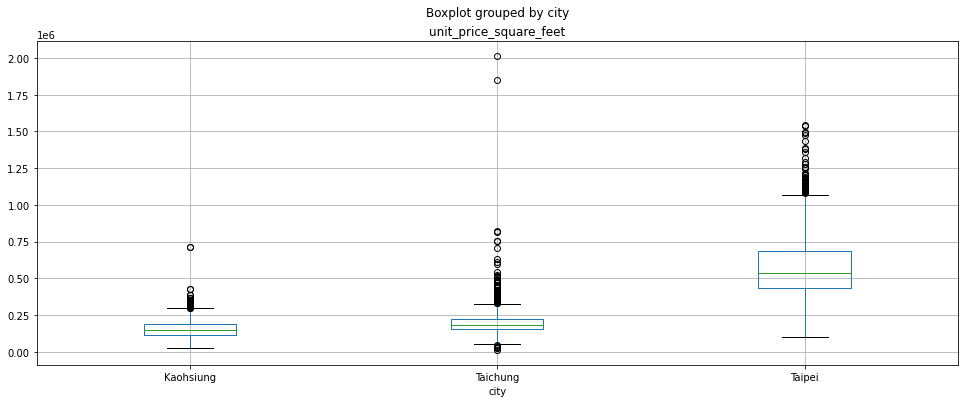

In [93]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
da2.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


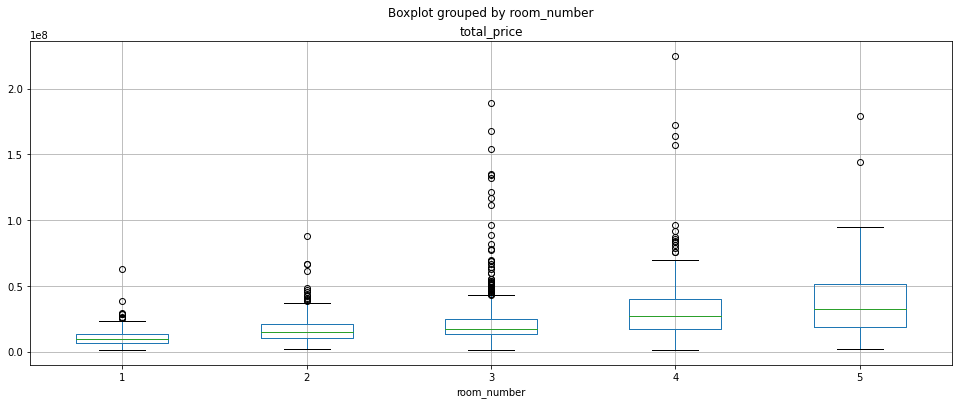

In [94]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
da2.loc[da2.city=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))

In [97]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(da2['towns'].values)
da2['new_towns'] = le.transform(da2['towns'].values)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


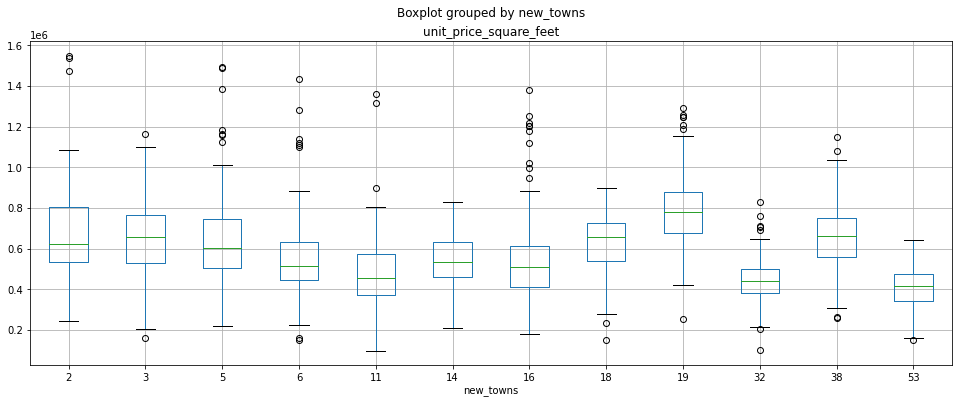

In [99]:
da2.loc[da2.city=='Taipei'].boxplot(column=['unit_price_square_feet'],by='new_towns',figsize=(16,6))

In [103]:
le.inverse_transform([19])

array(['大安區'], dtype=object)